In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve

In [65]:
from my_metr import accu, rating_to_prob

In [42]:
look = pd.read_csv('whats_wrong/model2_t.csv')

In [45]:


act = look.stars
base = look.mean_rating
pred = look.prediction.copy()
pred[pred>5] = 5
pred[pred<1] = 1
look.prediction = pred

In [35]:
combo  = pred.copy()
combo[pred>base] = base[pred>base]
co2 =pred.copy()
co2[pred<base] = base[pred<base]


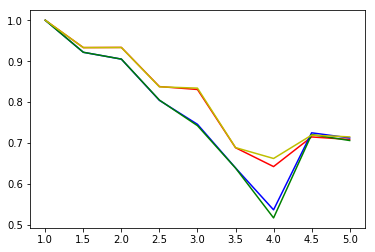

In [36]:
thres = np.linspace(1,5,9)
a_base = np.zeros(9)
a_pred = np.zeros(9)
a_combo = np.zeros(9)
a_co2 = np.zeros(9)
fig, ax = plt.subplots()

for i  in range(9):
    a_base[i] = accu(act, base, thres[i])
    a_pred[i] = accu(act, pred, thres[i])
    a_combo[i] =accu(act, combo, thres[i])
    a_co2[i] =accu(act, co2, thres[i])
ax.plot(thres, a_base, color = 'r')
ax.plot(thres, a_pred, color = 'b')
ax.plot(thres, a_combo, color ='g')
ax.plot(thres, a_co2, color ='y')
                   

In [21]:
look[['stars','mean_rating','prediction']].head()

,stars,mean_rating,prediction
0,4,2.5,3.192871
1,3,2.5,4.165812
2,1,2.5,3.771000
3,3,2.5,2.182666
4,3,3.5,3.433749


In [46]:
look.describe()

,Unnamed: 0,stars,user_count,user_num,biz_num,prediction,mean_rating
count,293669.000000,293669.000000,293669.000000,2.936690e+05,2.936690e+05,293669.000000,293669.000000
mean,146834.000000,3.701960,81.110550,7.869239e+06,-6.259119e+06,3.498915,3.704378
std,84775.082439,1.182502,141.256056,1.237261e+09,1.242599e+09,0.820289,0.581420
min,0.000000,1.000000,13.000000,-2.147428e+09,-2.147478e+09,1.000000,1.000000
25%,73417.000000,3.000000,21.000000,-1.052411e+09,-1.081292e+09,3.035330,3.500000
50%,146834.000000,4.000000,40.000000,1.184201e+07,-1.888382e+07,3.591236,4.000000
75%,220251.000000,5.000000,87.000000,1.086842e+09,1.059096e+09,4.066958,4.000000
max,293668.000000,5.000000,2316.000000,2.147407e+09,2.147459e+09,5.000000,5.000000


In [41]:
pred[act<=3].mean(), base[act<=3].mean(), pred[act>=3].mean(), base[act>=3].mean()

(3.1792809133547317, 3.4462038511106057, 3.591625635246152, 3.779418430390912)

In [55]:
y_true = (act < 3)

In [66]:
pred_score = rating_to_prob(pred)
base_score = rating_to_prob(base)

In [58]:
roc_auc_score(y_true, pred_score), roc_auc_score(y_true, base_score)

(0.6872722109569833, 0.6962089276665383)

In [63]:

def plot_auc (y_true, pred_score , ax, color):
    fpr, tpr, tresh  = roc_curve(y_true, pred_score)
    ax.plot(fpr,tpr, color = color)
    

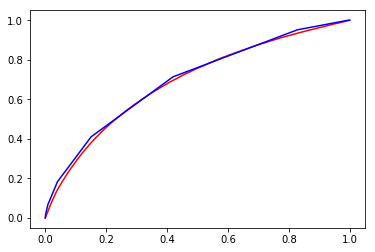

In [67]:
fig, ax = plt.subplots()
plot_auc (y_true, pred_score , ax, 'r')
plot_auc (y_true, base_score , ax, 'b')